In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
drug_prediction_data = pd.read_csv(r"drug200.csv")
drug_prediction_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
drug_prediction_data.info()
drug = drug_prediction_data['Drug'].unique()

chol = drug_prediction_data['Cholesterol'].unique()
bp = drug_prediction_data['BP'].unique()
print('\nDataset shape:',drug_prediction_data.shape)
print('\nDrugs:',drug,'\nCholestrol:',chol,'\nBP:',bp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB

Dataset shape: (200, 6)

Drugs: ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB'] 
Cholestrol: ['HIGH' 'NORMAL'] 
BP: ['HIGH' 'LOW' 'NORMAL']


In [4]:
drug_prediction_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [5]:
drug_prediction_data['Sex'] = drug_prediction_data['Sex'].replace({'M':1,'F':2})
drug_prediction_data['BP'] = drug_prediction_data['BP'].replace({'HIGH':1,'LOW':2,'NORMAL':3})
drug_prediction_data['Cholesterol'] = drug_prediction_data['Cholesterol'].replace({'HIGH':1,'NORMAL':0})
drug_prediction_data['Drug'] = drug_prediction_data['Drug'].replace({'DrugY':1,'drugC':2,'drugX':3,
                                                                   'drugA':4,'drugB':5})
drug_prediction_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,1,1,25.355,1
1,47,1,2,1,13.093,2
2,47,1,2,1,10.114,2
3,28,2,3,1,7.798,3
4,61,2,2,1,18.043,1


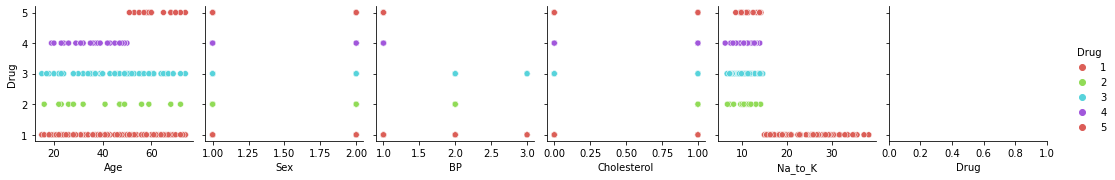

In [48]:
sns.pairplot(data=drug_prediction_data, x_vars=drug_prediction_data.iloc[:,:6], y_vars = 'Drug',hue='Drug', palette='hls')

<AxesSubplot:xlabel='Na_to_K'>

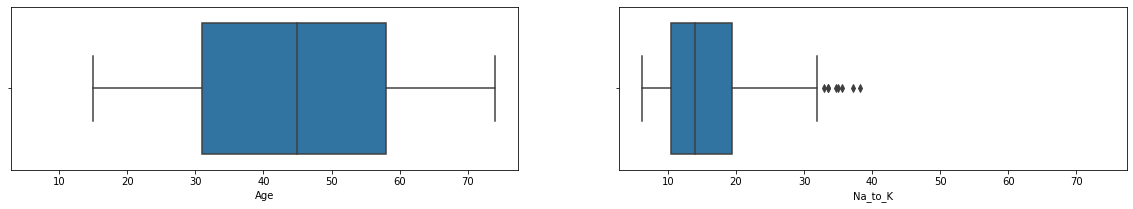

In [7]:
fige, axes = plt.subplots(1,2,sharex=True,figsize=(20,3))
sns.boxplot(data=drug_prediction_data,x='Age',ax=axes[0])
sns.boxplot(data=drug_prediction_data,x='Na_to_K',ax=axes[1])

In [8]:
X = drug_prediction_data.iloc[:,0:5]
Y = drug_prediction_data.iloc[:,5]

In [9]:
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,random_state=10,test_size=1/4)

In [10]:
#Perdiction using naive_bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
Ga_model = GaussianNB()

In [12]:
Ga_model.fit(xTrain.values,yTrain)

GaussianNB()

Accuracy score of GaussianNB: 86.0 %

Classification report of GaussianNB:               precision    recall  f1-score   support

           1       0.72      1.00      0.84        13
           2       1.00      0.88      0.93         8
           3       1.00      1.00      1.00        14
           4       1.00      0.55      0.71        11
           5       0.60      0.75      0.67         4

    accuracy                           0.86        50
   macro avg       0.86      0.83      0.83        50
weighted avg       0.90      0.86      0.86        50


Confusion matrix:
 [[13  0  0  0  0]
 [ 1  7  0  0  0]
 [ 0  0 14  0  0]
 [ 3  0  0  6  2]
 [ 1  0  0  0  3]]


C:\Python_39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Python_39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Drug', ylabel='Density'>

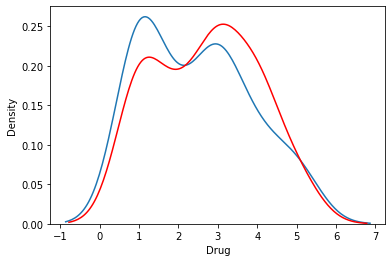

In [97]:
Ga_y_predict = Ga_model.predict(xTest.values)
print('Accuracy score of GaussianNB:',accuracy_score(Ga_y_predict,yTest)*100,'%')
print('\nClassification report of GaussianNB:',classification_report(Ga_y_predict,yTest))
print('\nConfusion matrix:\n',confusion_matrix(Ga_y_predict,yTest))
sns.distplot(yTest,hist=False)
sns.distplot(Ga_y_predict,hist=False,color='r')

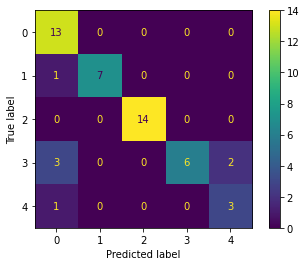

In [50]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Ga_y_predict,yTest))
cm_display.plot()

In [85]:
data_0 = np.array([47,1,2,1,10.114]).reshape(1,-1)
data_1 = np.array([23,2,1,1,25.355]).reshape(1,-1)
drug_prediction_data.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,1,1,25.355,1
1,47,1,2,1,13.093,2
2,47,1,2,1,10.114,2


In [110]:
predition = Ga_model.predict(data_0)
print(predition,drug[predition-1])
predition = Ga_model.predict(data_1)
print(predition,drug[predition-1])

[2] ['drugC']
[1] ['DrugY']


In [17]:
# Prediction using SVM classifire

In [18]:
from sklearn.svm import SVC
SVC_model = SVC(kernel='linear',C=1E10)

In [19]:
SVC_model.fit(xTrain.values,yTrain)

SVC(C=10000000000.0, kernel='linear')

In [20]:
SVC_Y_prediction = SVC_model.predict(xTest.values)

Accuracy score of GaussianNB: 98.0

Classification report of GaussianNB:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        14
           4       1.00      0.86      0.92         7
           5       0.80      1.00      0.89         4

    accuracy                           0.98        50
   macro avg       0.96      0.97      0.96        50
weighted avg       0.98      0.98      0.98        50


Confusion matrix: [[18  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0  6  1]
 [ 0  0  0  0  4]]


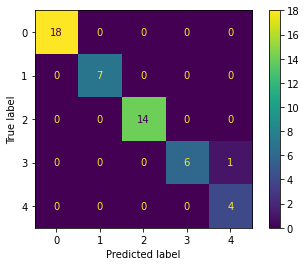

In [51]:
print('Accuracy score of GaussianNB:',accuracy_score(SVC_Y_prediction,yTest)*100)
print('\nClassification report of GaussianNB:',classification_report(SVC_Y_prediction,yTest))
print('\nConfusion matrix:',confusion_matrix(SVC_Y_prediction,yTest))
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(SVC_Y_prediction,yTest))
cm_display.plot()

In [71]:
data =np.array([47,1,2,1,10.114]).reshape(1,-1)

In [72]:
predition = SVC_model.predict(data)

[3] ['drugX']


C:\Python_39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Python_39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Drug', ylabel='Density'>

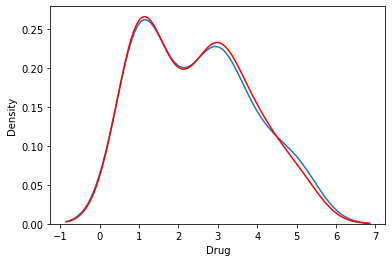

In [109]:
print(predition,drug[predition-1])
sns.distplot(yTest,hist=False)
sns.distplot(SVC_Y_prediction,hist=False,color='r')

In [25]:
#Logostric Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [27]:
log_reg_model = LogisticRegression()
stdslr = StandardScaler()

In [28]:
std_xTrain = stdslr.fit_transform(xTrain)
std_xTest = stdslr.fit_transform(xTest)

In [29]:
log_reg_model.fit(std_xTrain,yTrain)

LogisticRegression()

In [30]:
Log_y_prediction = log_reg_model.predict(std_xTest)

In [31]:
print('Accuracy score of GaussianNB:',accuracy_score(SVC_Y_prediction,yTest)*100)
print('\nClassification report of GaussianNB:',classification_report(SVC_Y_prediction,yTest))
print('\nConfusion matrix:',confusion_matrix(SVC_Y_prediction,yTest))

Accuracy score of GaussianNB: 98.0

Classification report of GaussianNB:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        14
           4       1.00      0.86      0.92         7
           5       0.80      1.00      0.89         4

    accuracy                           0.98        50
   macro avg       0.96      0.97      0.96        50
weighted avg       0.98      0.98      0.98        50


Confusion matrix: [[18  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0  6  1]
 [ 0  0  0  0  4]]


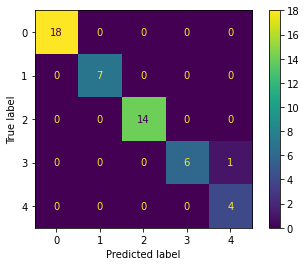

In [32]:
matrix_plot = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(SVC_Y_prediction,yTest))
matrix_plot.plot()

In [103]:
data =np.array([52,1,3,1,9.894]).reshape(1,-1)
drug_prediction_data.tail(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
197,52,1,3,1,9.894,3
198,23,1,3,0,14.020,3
199,40,2,2,0,11.349,3


In [104]:
predition = SVC_model.predict(data)

In [108]:
print(predition,drug[predition-1])

[3] ['drugX']


C:\Python_39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Python_39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Drug', ylabel='Density'>

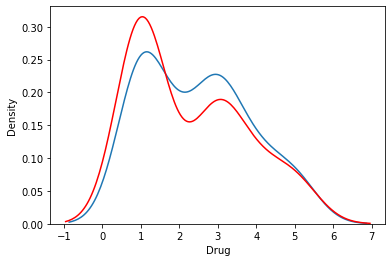

In [106]:
sns.distplot(yTest,hist=False)
sns.distplot(Log_y_prediction,hist=False,color='r')